# Reynolds stress tensor


The Reynolds stress tensor
$$ R := \overline{u_i ' u_j '} = \begin{pmatrix}
			u'^2 & \overline{u'v'} & \overline{u'w'} \\
			\overline{v'u'} & v'^2 & \overline{v'w'} \\
			\overline{w'u'} & \overline{w'v'} & w'^2 
		\end{pmatrix}, \quad \textrm{with} \quad R = R^T$$
summarizes all normal and shear stresses. Based on an invariant analysis, the most important geometric properties can be derived from its eigenvalues and eigenvectors. Using a linear combination of the three eigenvalues, a two-dimensional mapping into an equilateral triangle -- called *barycentric map* -- with the coordinates $(x_B,y_B)$, can be constructed, which allows to characterize the anisotropy ($y_B$) and the limiting states.

In [1]:
#loading Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE)
library(Reddy)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")

Installing package into ‘/home/lauracma/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



## Invariant analysis of the Reynolds stress tensor
### Performing the invariant analysis of the Reynolds stress tensor with `calc_anisotropy`
The function `calc_anisotropy` calculates the invariant analysis and takes for this vectors for all six independent components of the Reynolds stress tensor as input (since it is symmetric there are only six not nine independent entries) in the form
$$ R  = \begin{pmatrix}
			a_{11} & a_{12} & a_{13}\\
			a_{12} & a_{22} & a_{23} \\
			a_{13} & a_{23} & a_{33} 
		\end{pmatrix}
$$
and in the order $a_{11}, a_{12}, a_{13}, a_{22}, a_{23}, a_{33}$.

In [2]:
rey_ana = calc_anisotropy(dat$u_sd^2,dat$cov_uv,dat$cov_uw,dat$v_sd^2,dat$cov_vw,dat$w_sd^2)
str(rey_ana)

List of 6
 $ xb          : num [1:127] 0.348 0.249 0.326 0.257 0.188 ...
 $ yb          : num [1:127] 0.119 0.124 0.101 0.103 0.117 ...
 $ eta         : num [1:127] 0.165 0.152 0.166 0.157 0.148 ...
 $ xi          : num [1:127] -0.0562 -0.1214 -0.0821 -0.1202 -0.1353 ...
 $ eigenvalues : num [1:127, 1:3] 0.283 0.232 0.281 0.245 0.204 ...
 $ eigenvectors: num [1:127, 1:3, 1:3] 0.89759 0.93931 0.86082 0.00664 -0.64731 ...


The output contains the coordinates of the barycentric map (`xb, yb`) and of the Lumley triangle (`eta, xi`) as well as all eigenvalues and eigenvectors.

### Plotting the barycentric map using `plot_barycentric_map`
The function `plot_barycentric_map` takes `xb, yb` as input (as calculated in the invariant analysis before) and plots them in the barycentric map.

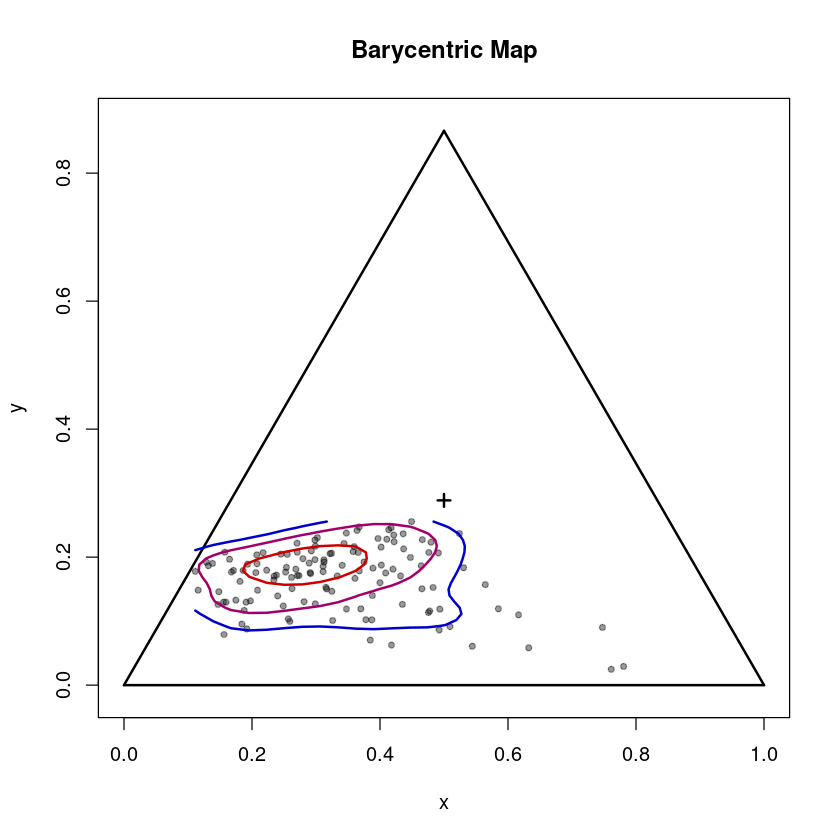

In [3]:
plot_barycentric_map(rey_ana$xb,rey_ana$yb)

The three corners of the tringle represent the three limiting state: 3-component limit (isotropic, "sphere-like") at $(0.5,\sqrt{3}/2$), 2-component limit ("disk-like") at $(0,0)$ and 1-component limit ("rod-like") at $(1,0)$. $y_B$ is a measure for anisotropy (from $y_B = 0$ completely anisotropic to $y_B = \sqrt(3)/2$ perfectly isotropic.  

## Anisotropy and velocity aspect ratio (VAR)

The velocity aspect ratio VAR (`calc_var`) is an approximation of anisotropy that only takes the diagonal elements of the Reynolds stress tensor, i.e., $\sigma_u, \sigma_v,\sigma_w$, into account. A deviation from a linear regression between VAR and $y_B$ allows quantify the effect of shear stresses. As seen in the plot below, for small values of $y_B$, i.e., very anisotropic, is the deviation from the linear fit larger than for higher values of $y_B$.


Call:
lm(formula = rey_ana$yb ~ var)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.011421 -0.003373 -0.001110  0.003227  0.021316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.08683    0.00265  -32.77   <2e-16 ***
var          0.64442    0.00660   97.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005629 on 125 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.987 
F-statistic:  9534 on 1 and 125 DF,  p-value: < 2.2e-16



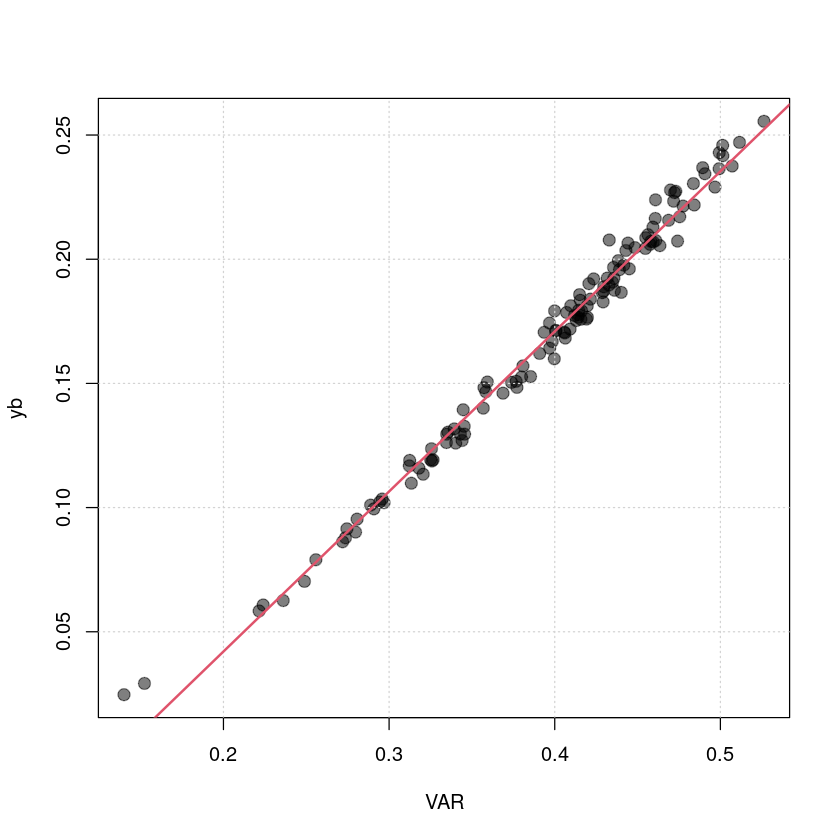

In [4]:
var=calc_var(dat$u_sd,dat$v_sd,dat$w_sd)
plot(var,rey_ana$yb,col=rgb(0,0,0,0.5),pch=20,cex=2,xlab="VAR",ylab="yb")
grid()
fit=lm(rey_ana$yb~var)
abline(fit,lwd=2,col=2)
print(summary(fit))

## Literature
- Banerjee, S., Krahl, R., Durst, F., and Zenger, C. (2007). Presentation of
anisotropy properties of turbulence, invariants versus eigenvalue approaches.
J Turb, 8(N32).